### Install
* Ultraytics Yolov5

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5; pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 20.53 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 16.5 MB/s eta 0:00:0000:01


### Ultralytics Yolo directory

In [2]:
# Ultralytics Yolo directory
!mkdir /kaggle/working/dataset
!cd /kaggle/working/dataset; mkdir images; mkdir labels
!cd /kaggle/working/dataset/images; mkdir train; mkdir val
!cd /kaggle/working/dataset/labels; mkdir train; mkdir val

### Make train/val data & Convert to Yolo format

In [3]:
!git clone https://github.com/giyeongyoon/mushroom_yolo.git

Cloning into 'mushroom_yolo'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 2.33 MiB | 6.38 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [4]:
%cd /kaggle/working/mushroom_yolo/utils
%run data_reader.ipynb
%run convert_format.ipynb

/kaggle/working/mushroom_yolo/utils


In [5]:
train_df = make_train_val_df('/kaggle/input/mushroom-dataset/TS5_', '/kaggle/input/mushroom-dataset/TL5_')
val_df = make_train_val_df('/kaggle/input/mushroom-dataset/VS5_', '/kaggle/input/mushroom-dataset/VL5_')

train_tiny_df = train_df.sample(n=3200, random_state=1004)
val_tiny_df = val_df.sample(n=800, random_state=1004)

In [6]:
# train용 images와 labels annotation 생성.
make_yolo_anno_file(train_tiny_df, '/kaggle/working/dataset/images/train/', '/kaggle/working/dataset/labels/train/')

# val용 images와 labels annotation 생성
make_yolo_anno_file(val_tiny_df, '/kaggle/working/dataset/images/val/', '/kaggle/working/dataset/labels/val/')

### Train

In [7]:
!mkdir /kaggle/working/mush_workdir

In [7]:
!cd /kaggle/working/yolov5; python train.py --img 640 --batch 16 --epochs 20 --data /kaggle/working/mushroom_yolo/mushroom_kaggle.yaml --weights yolov5s.pt --project=/kaggle/working/mush_workdir \
                                     --name shiitake --exist-ok

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/mushroom_yolo/mushroom_kaggle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/kaggle/working/mush_workdir, name=shiitake, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=

### Visualize

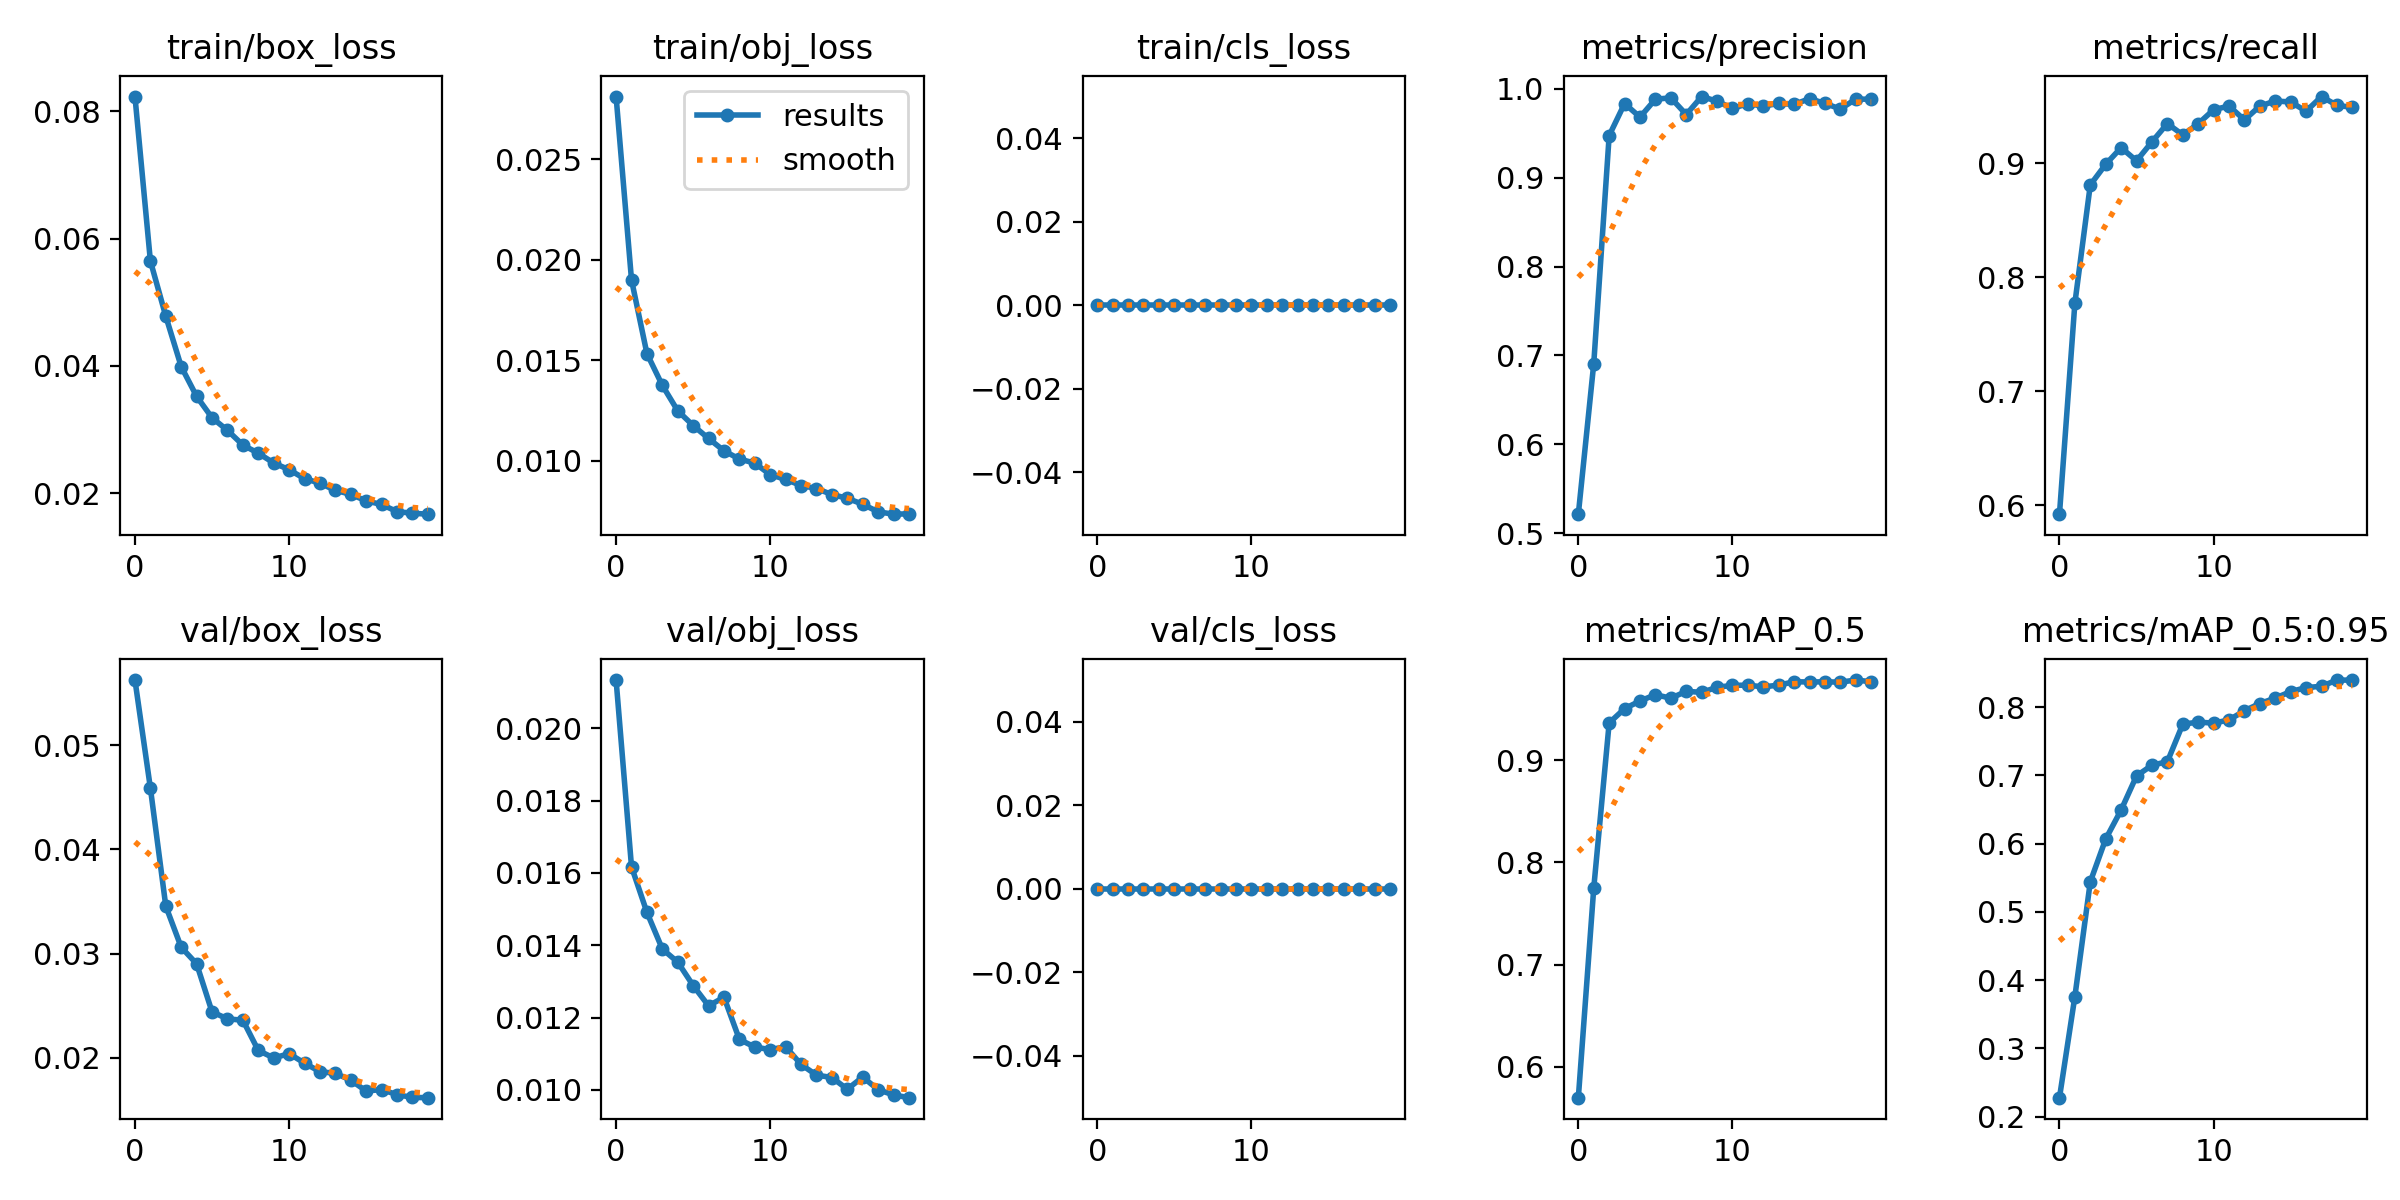

In [10]:
from IPython.display import Image

Image('/kaggle/working/mush_workdir/shiitake/results.png')  # plot 'results.csv' as 'results.png'

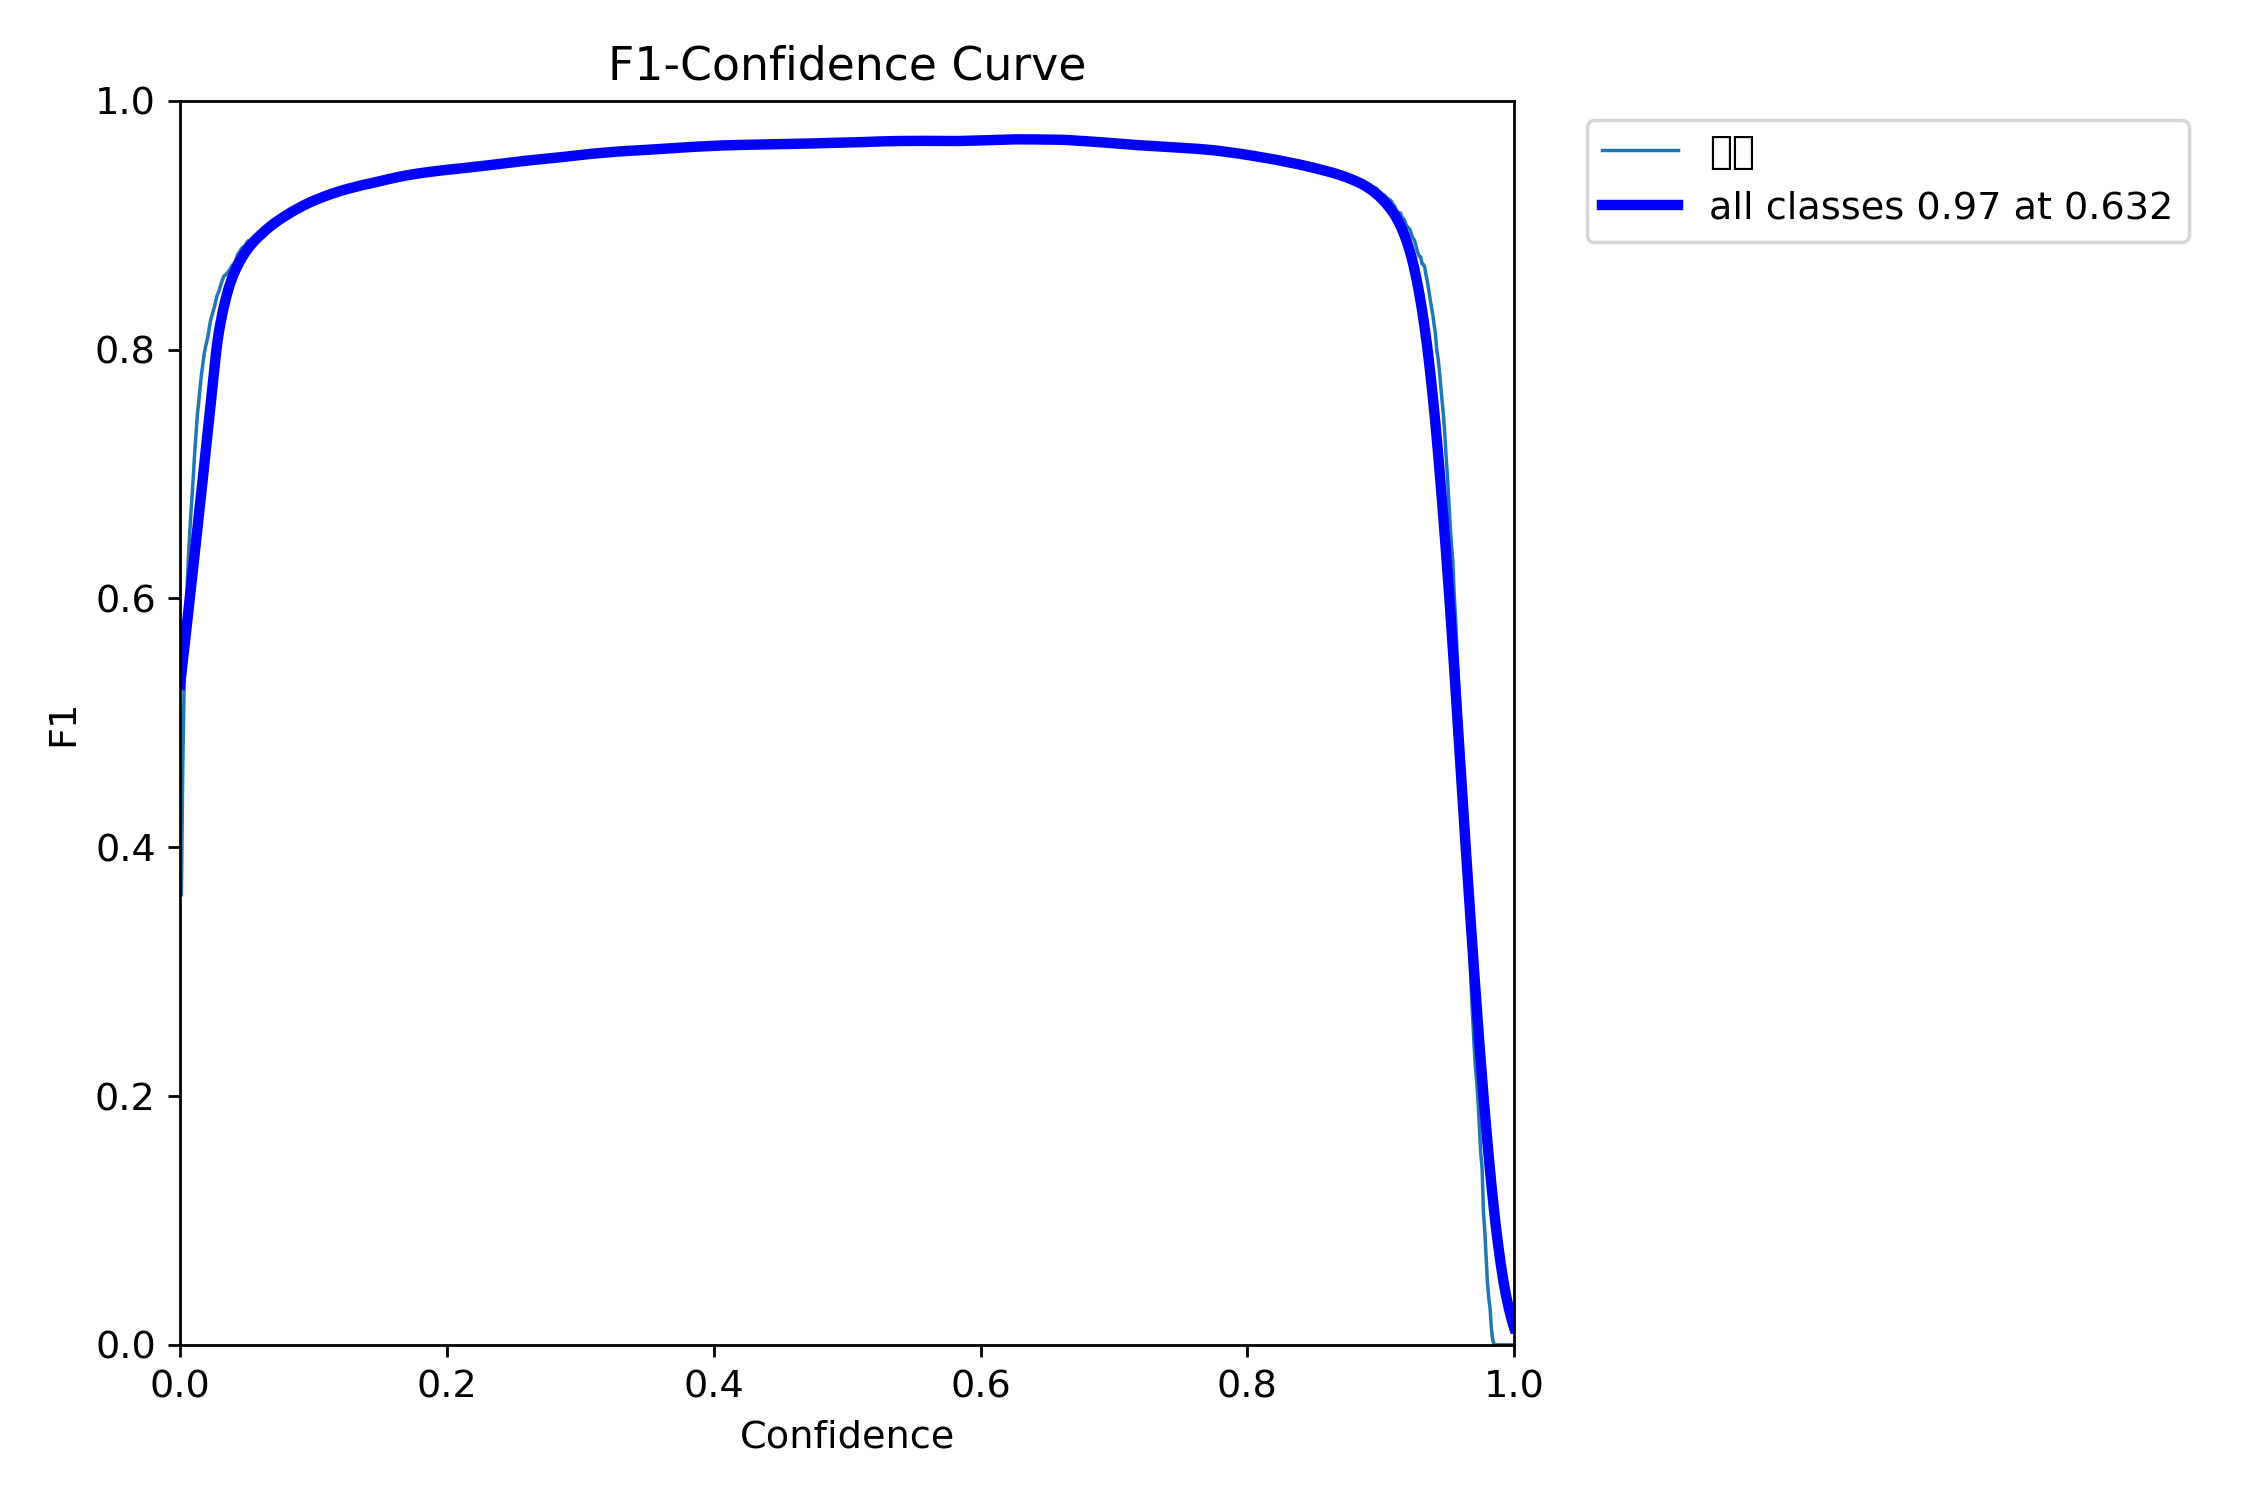

In [12]:
Image('/kaggle/working/mush_workdir/shiitake/F1_curve.png')

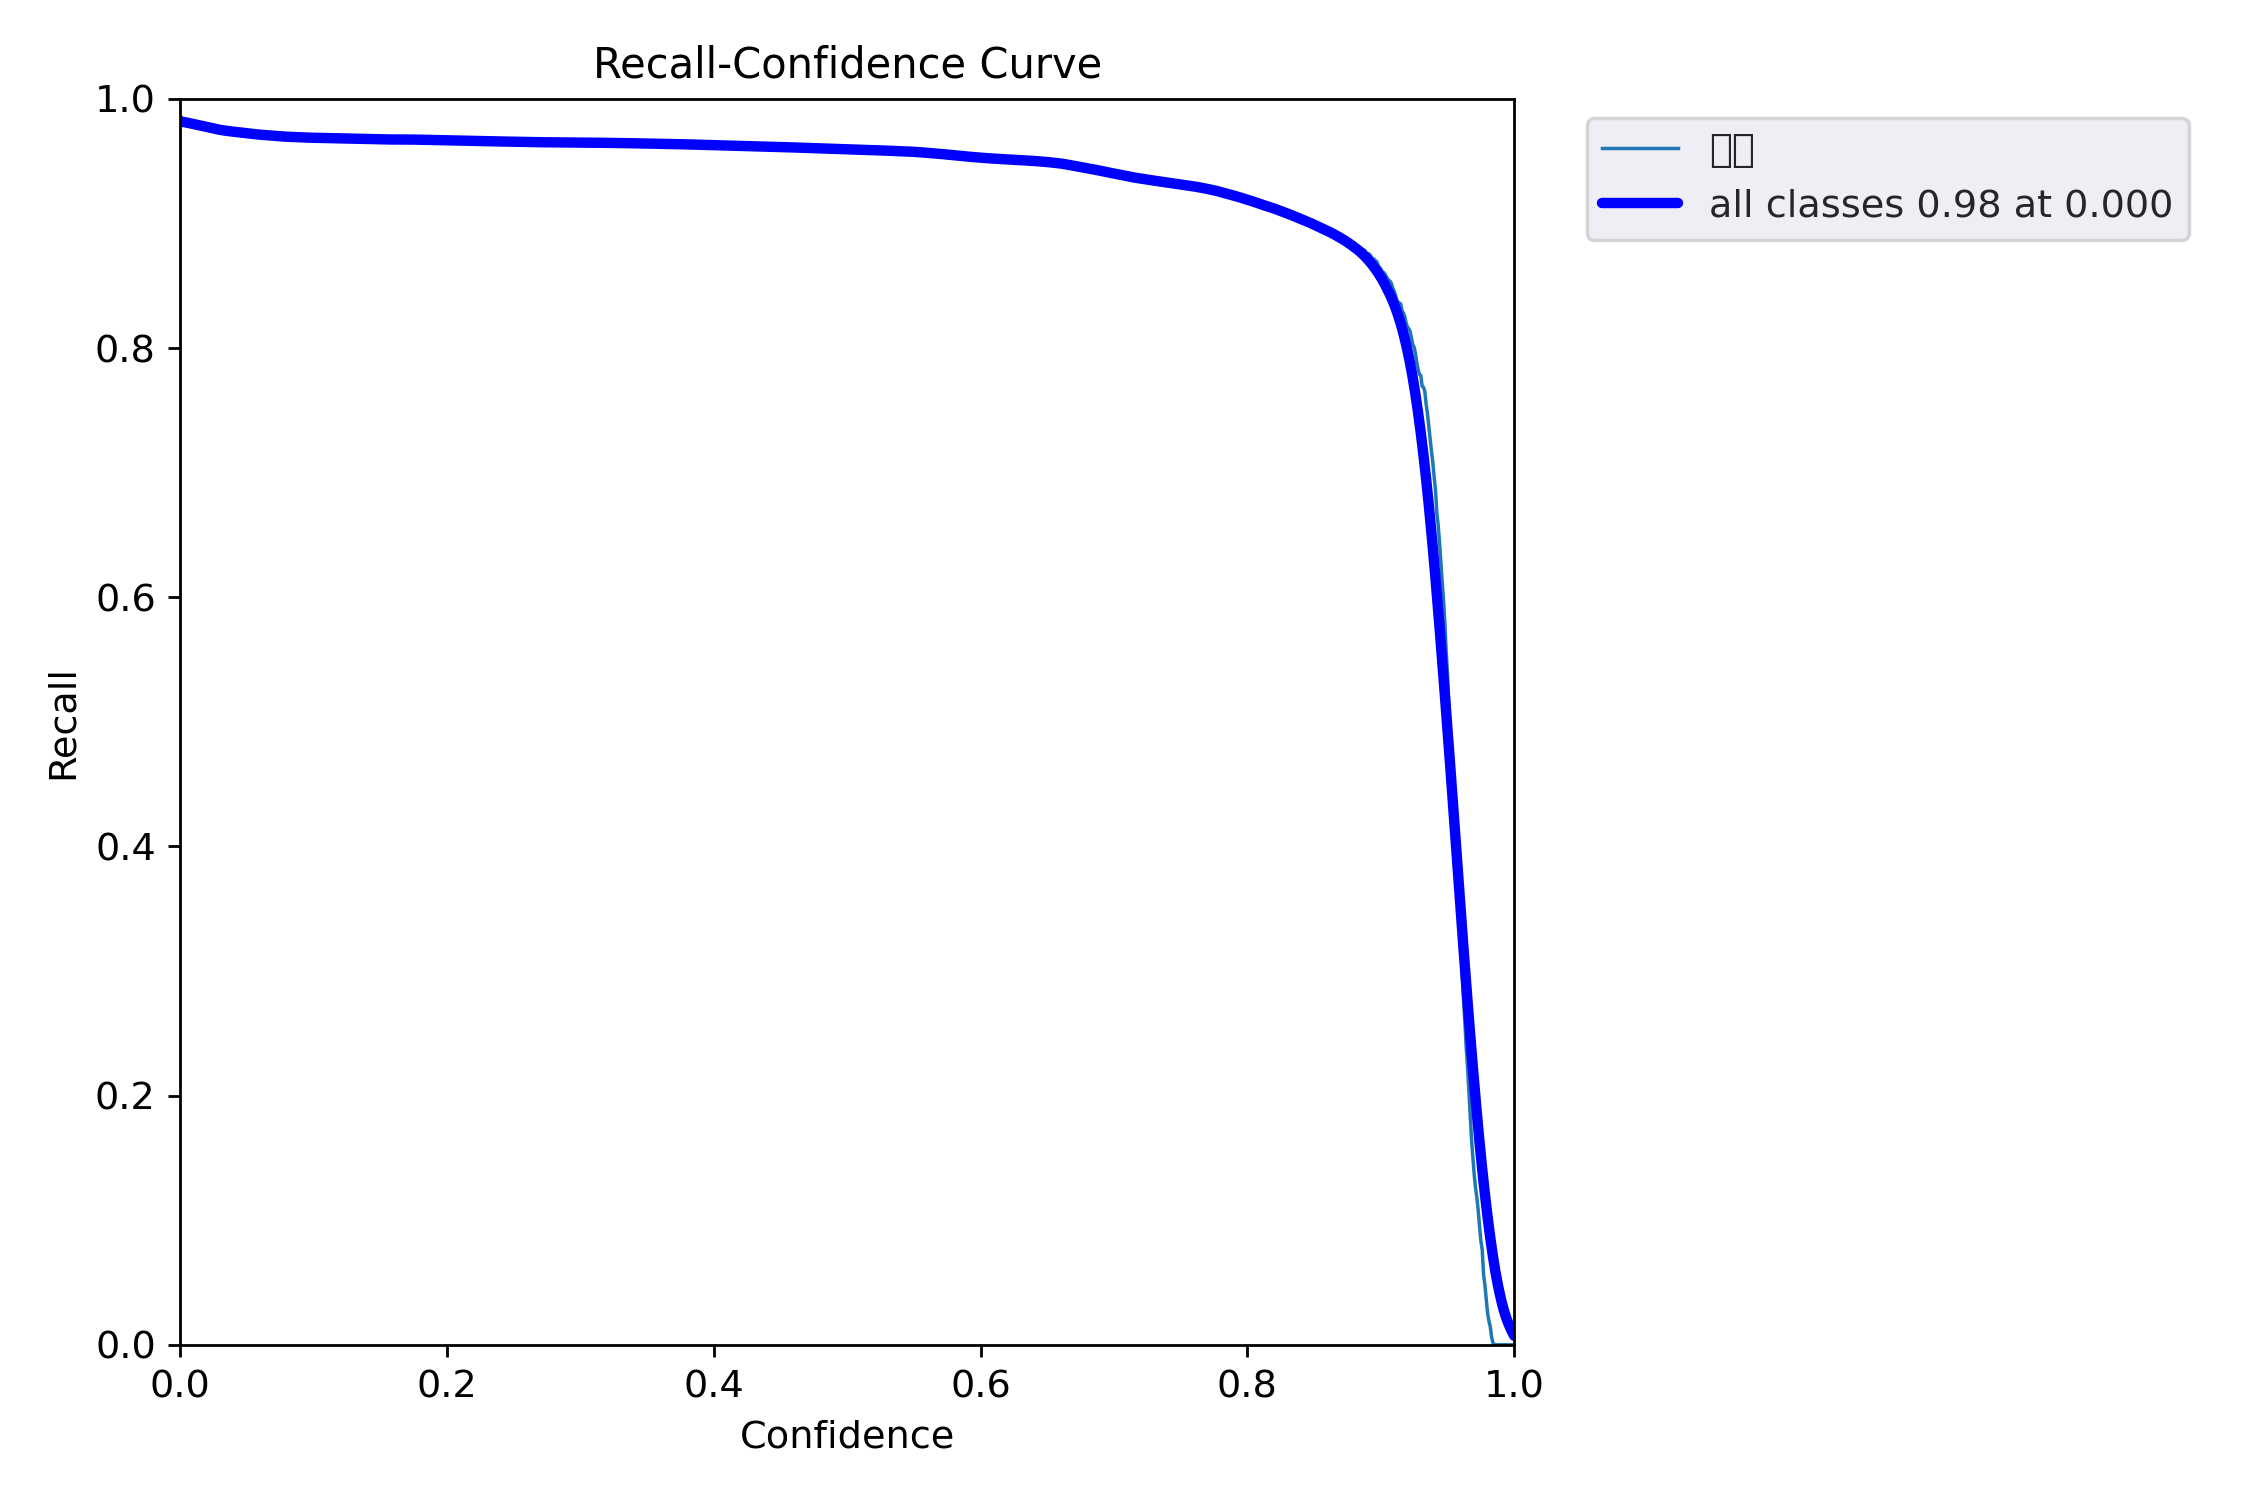

In [13]:
Image('/kaggle/working/mush_workdir/shiitake/R_curve.png')

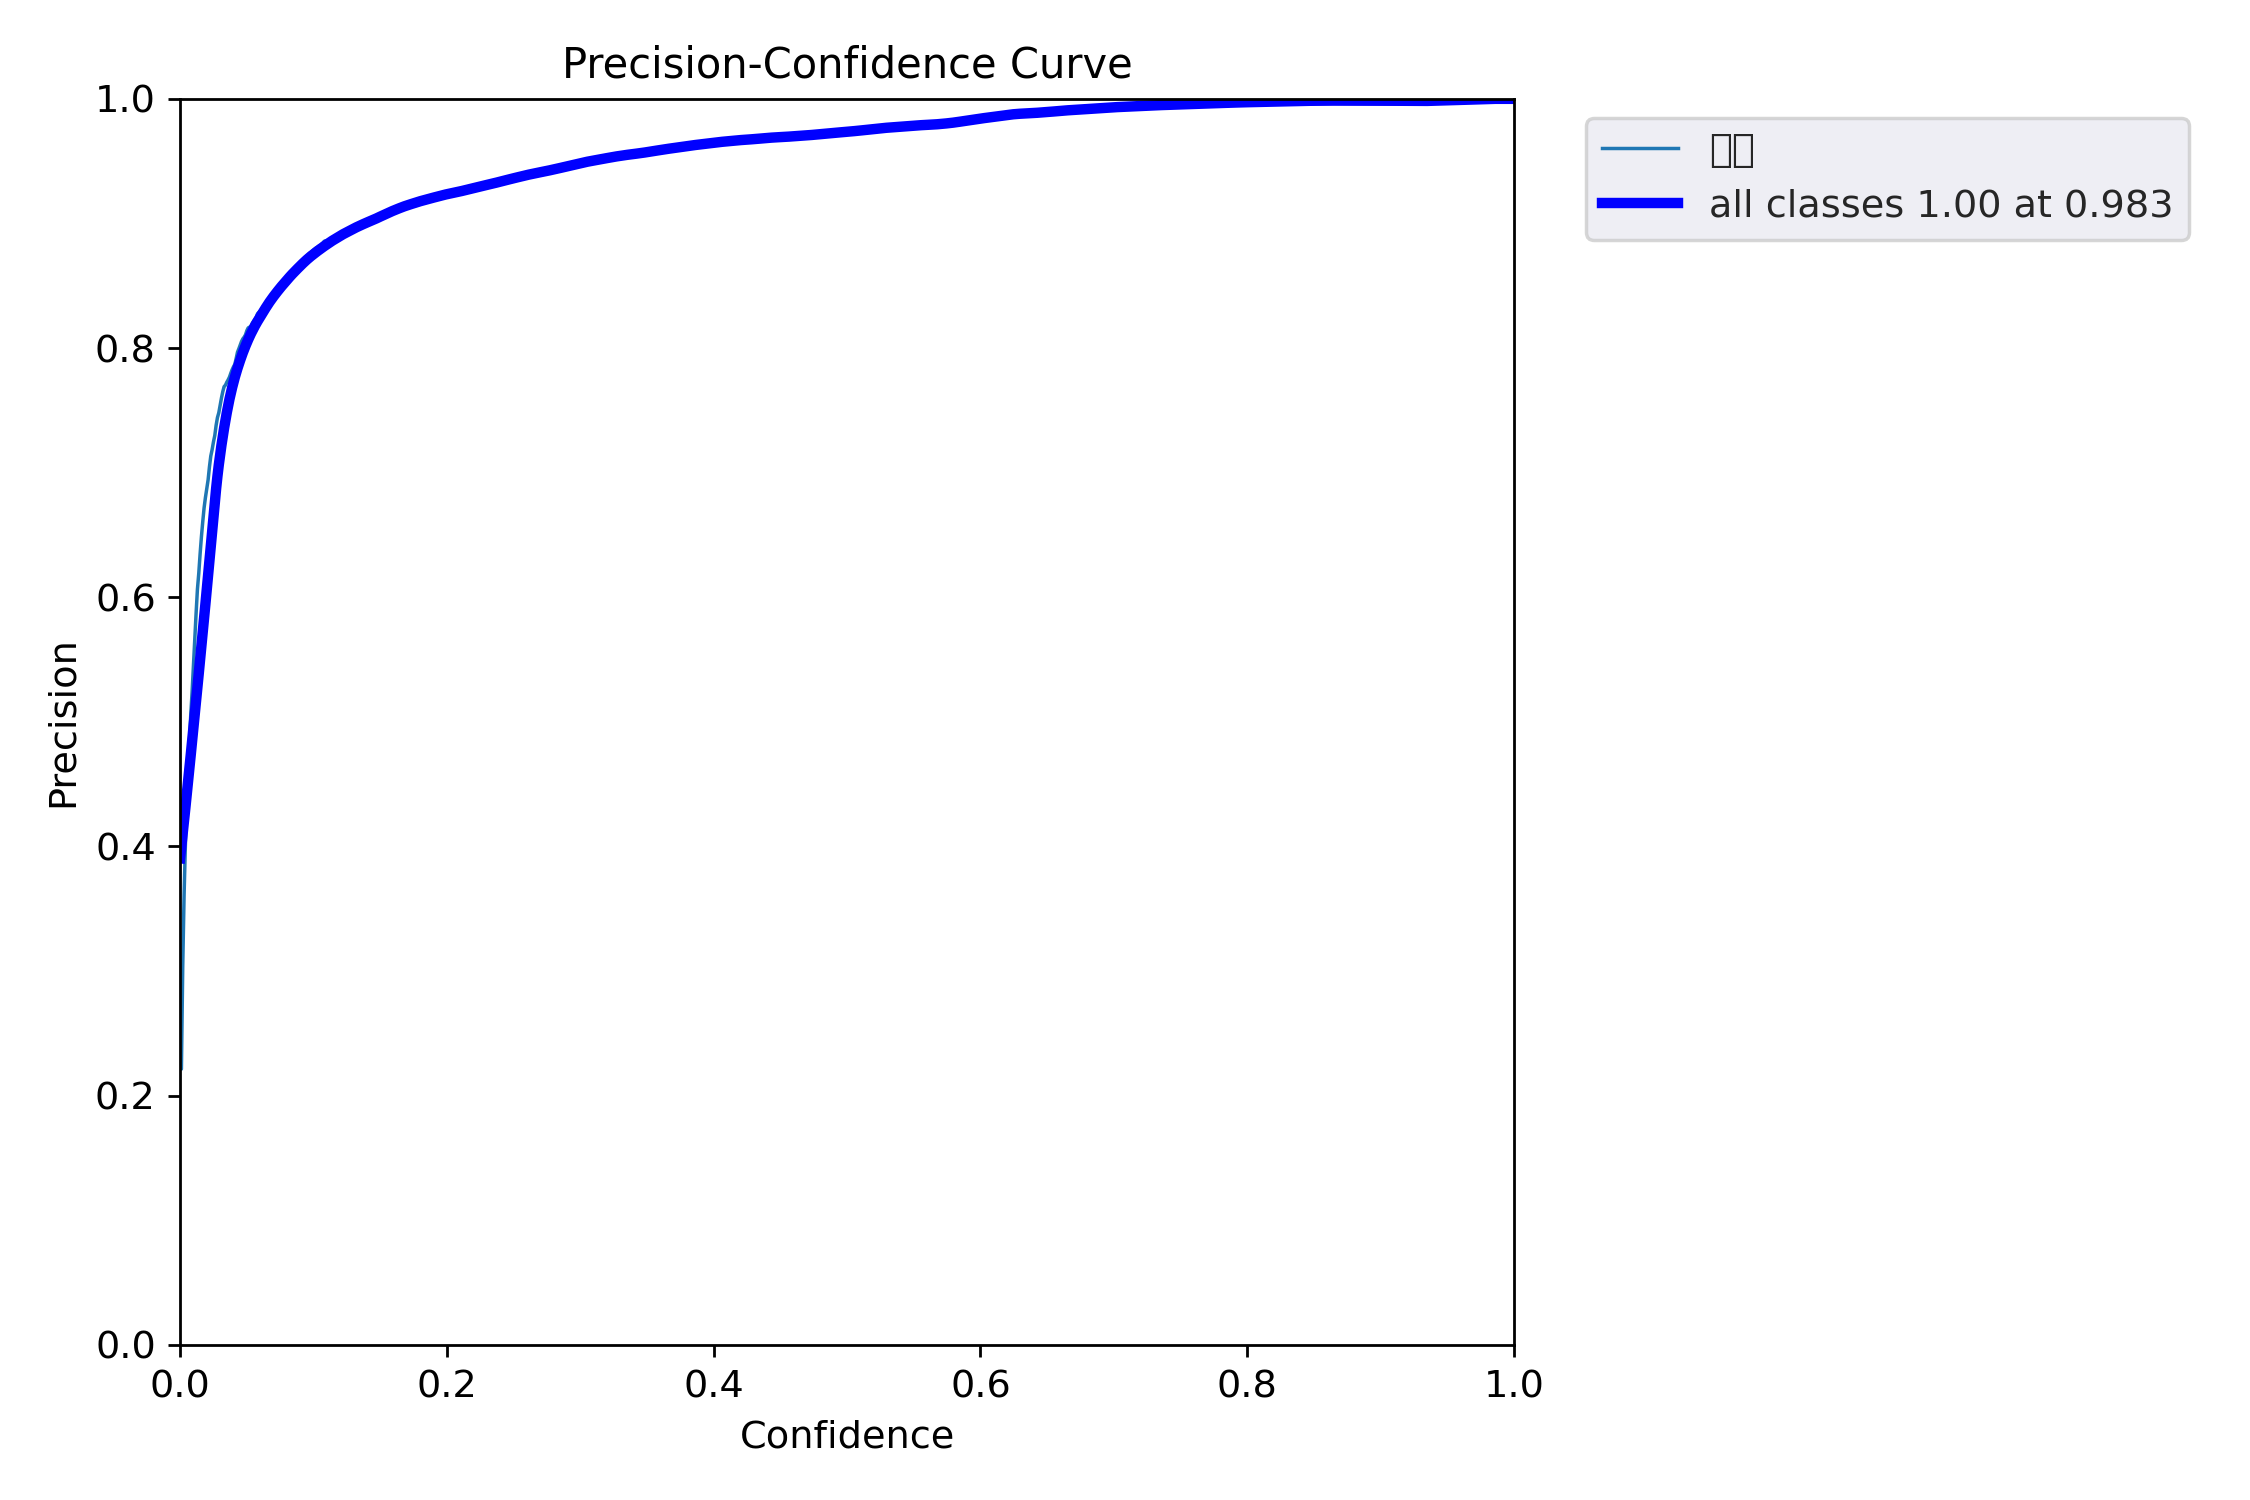

In [15]:
Image('/kaggle/working/mush_workdir/shiitake/P_curve.png')

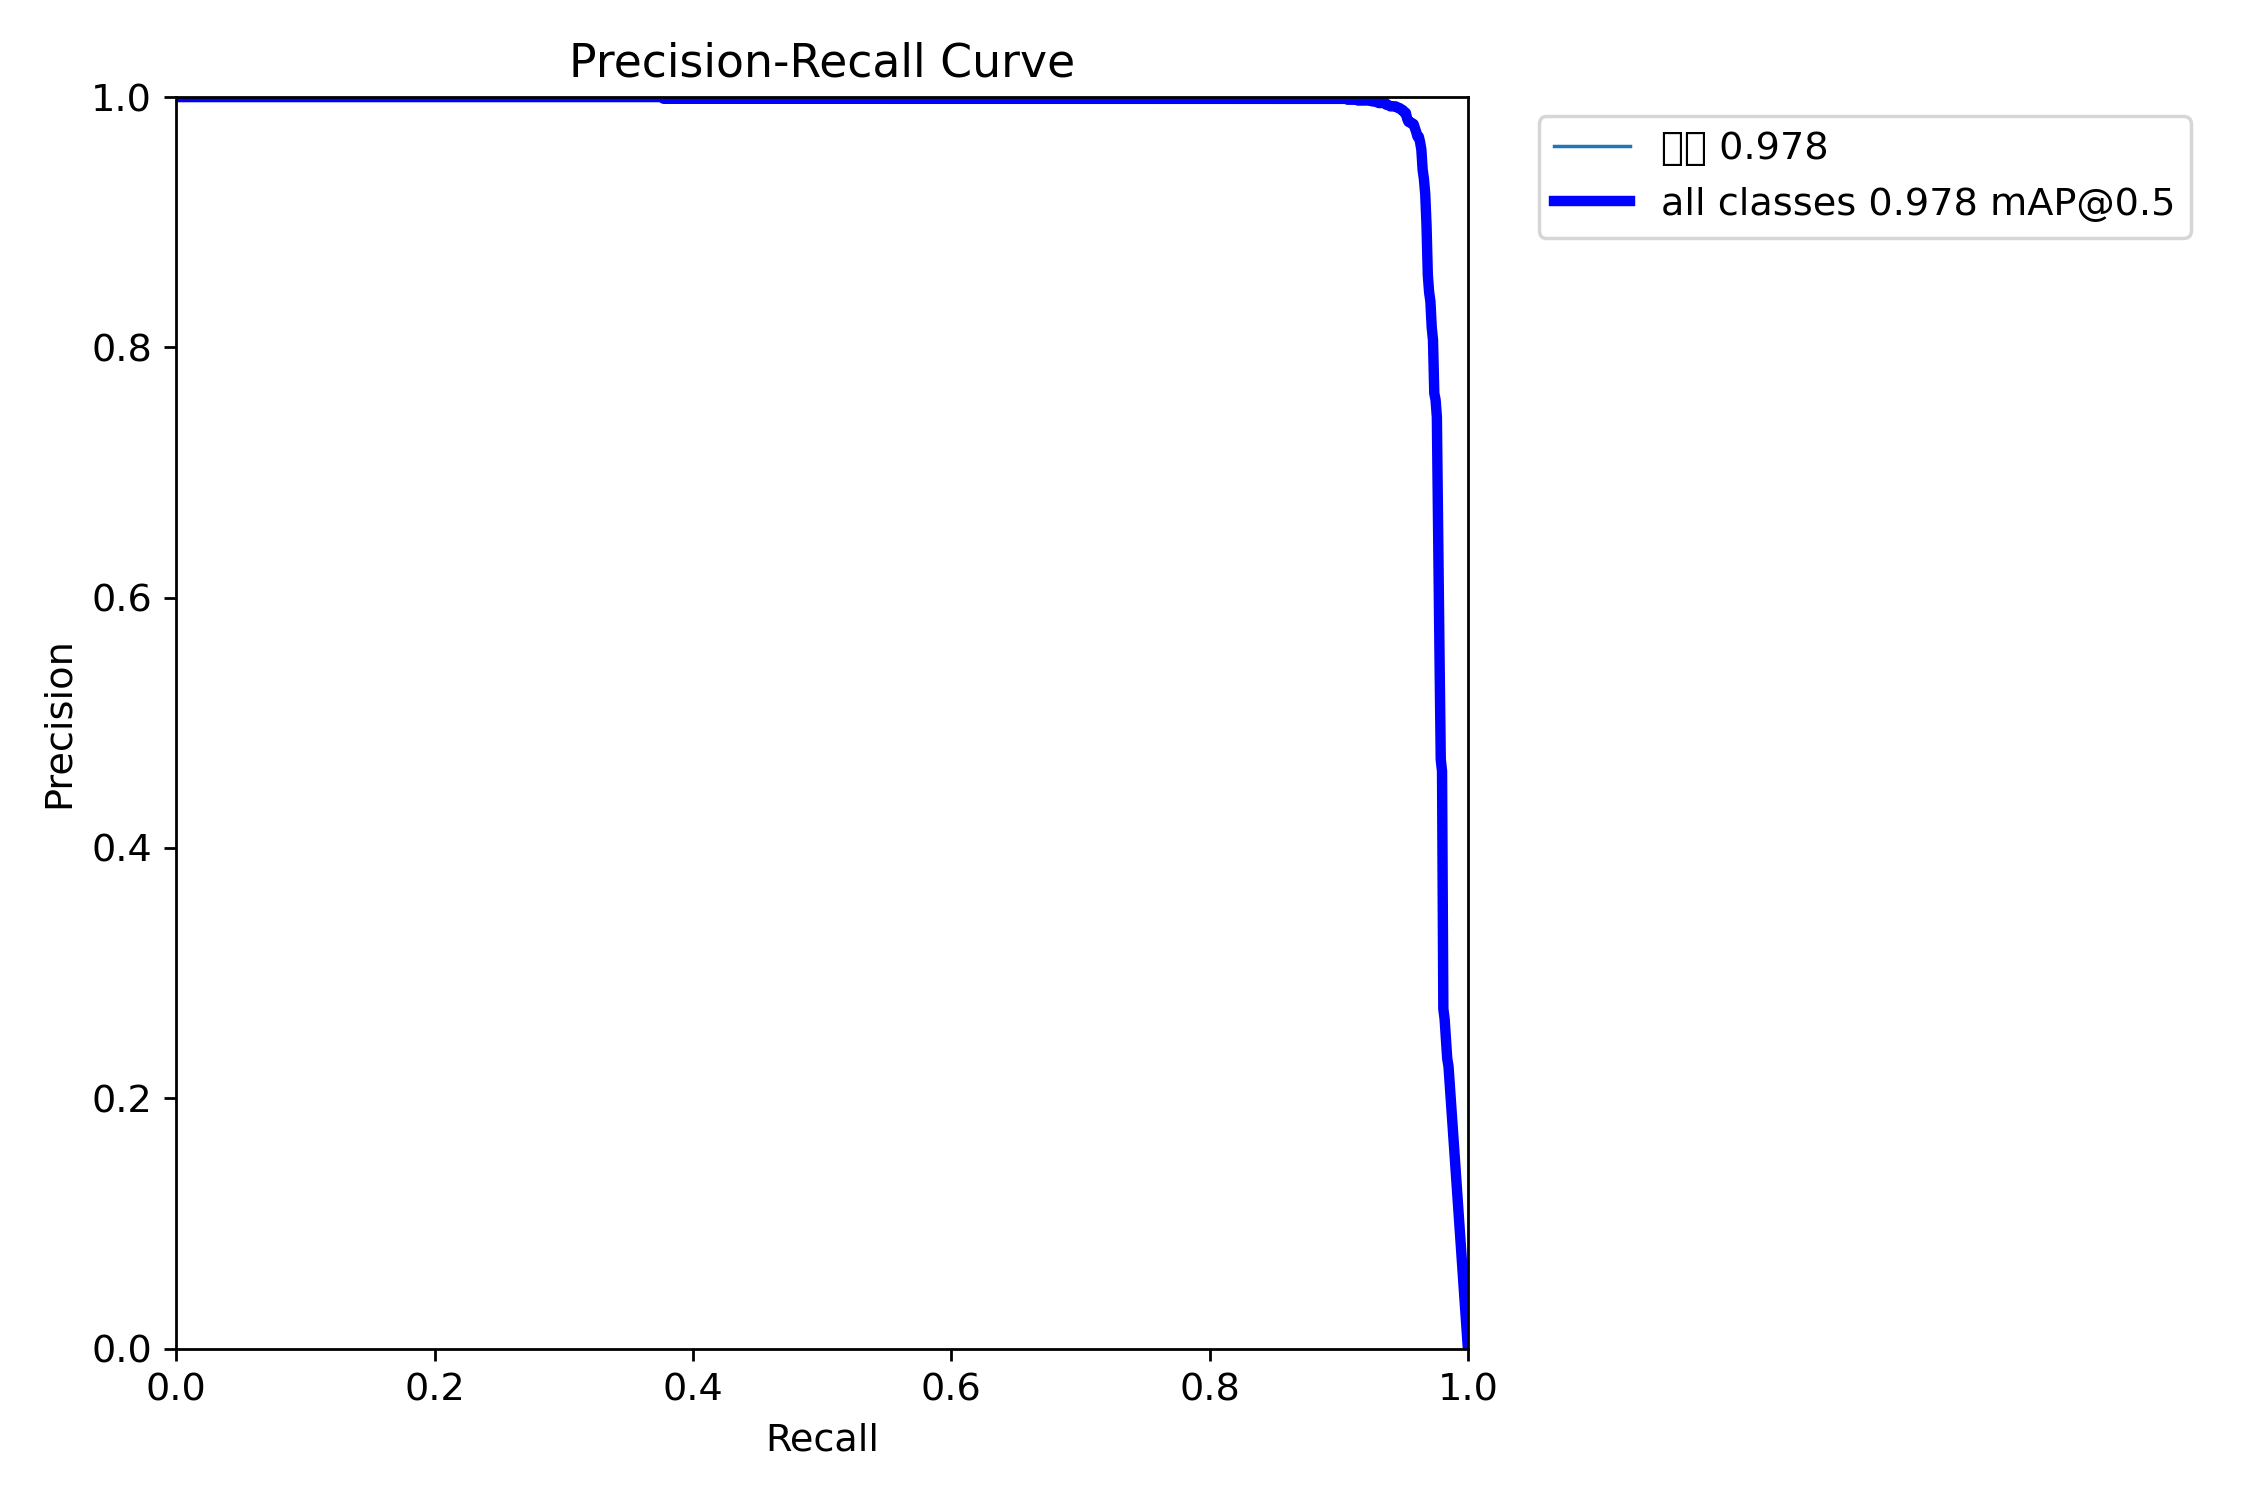

In [16]:
Image('/kaggle/working/mush_workdir/shiitake/PR_curve.png')

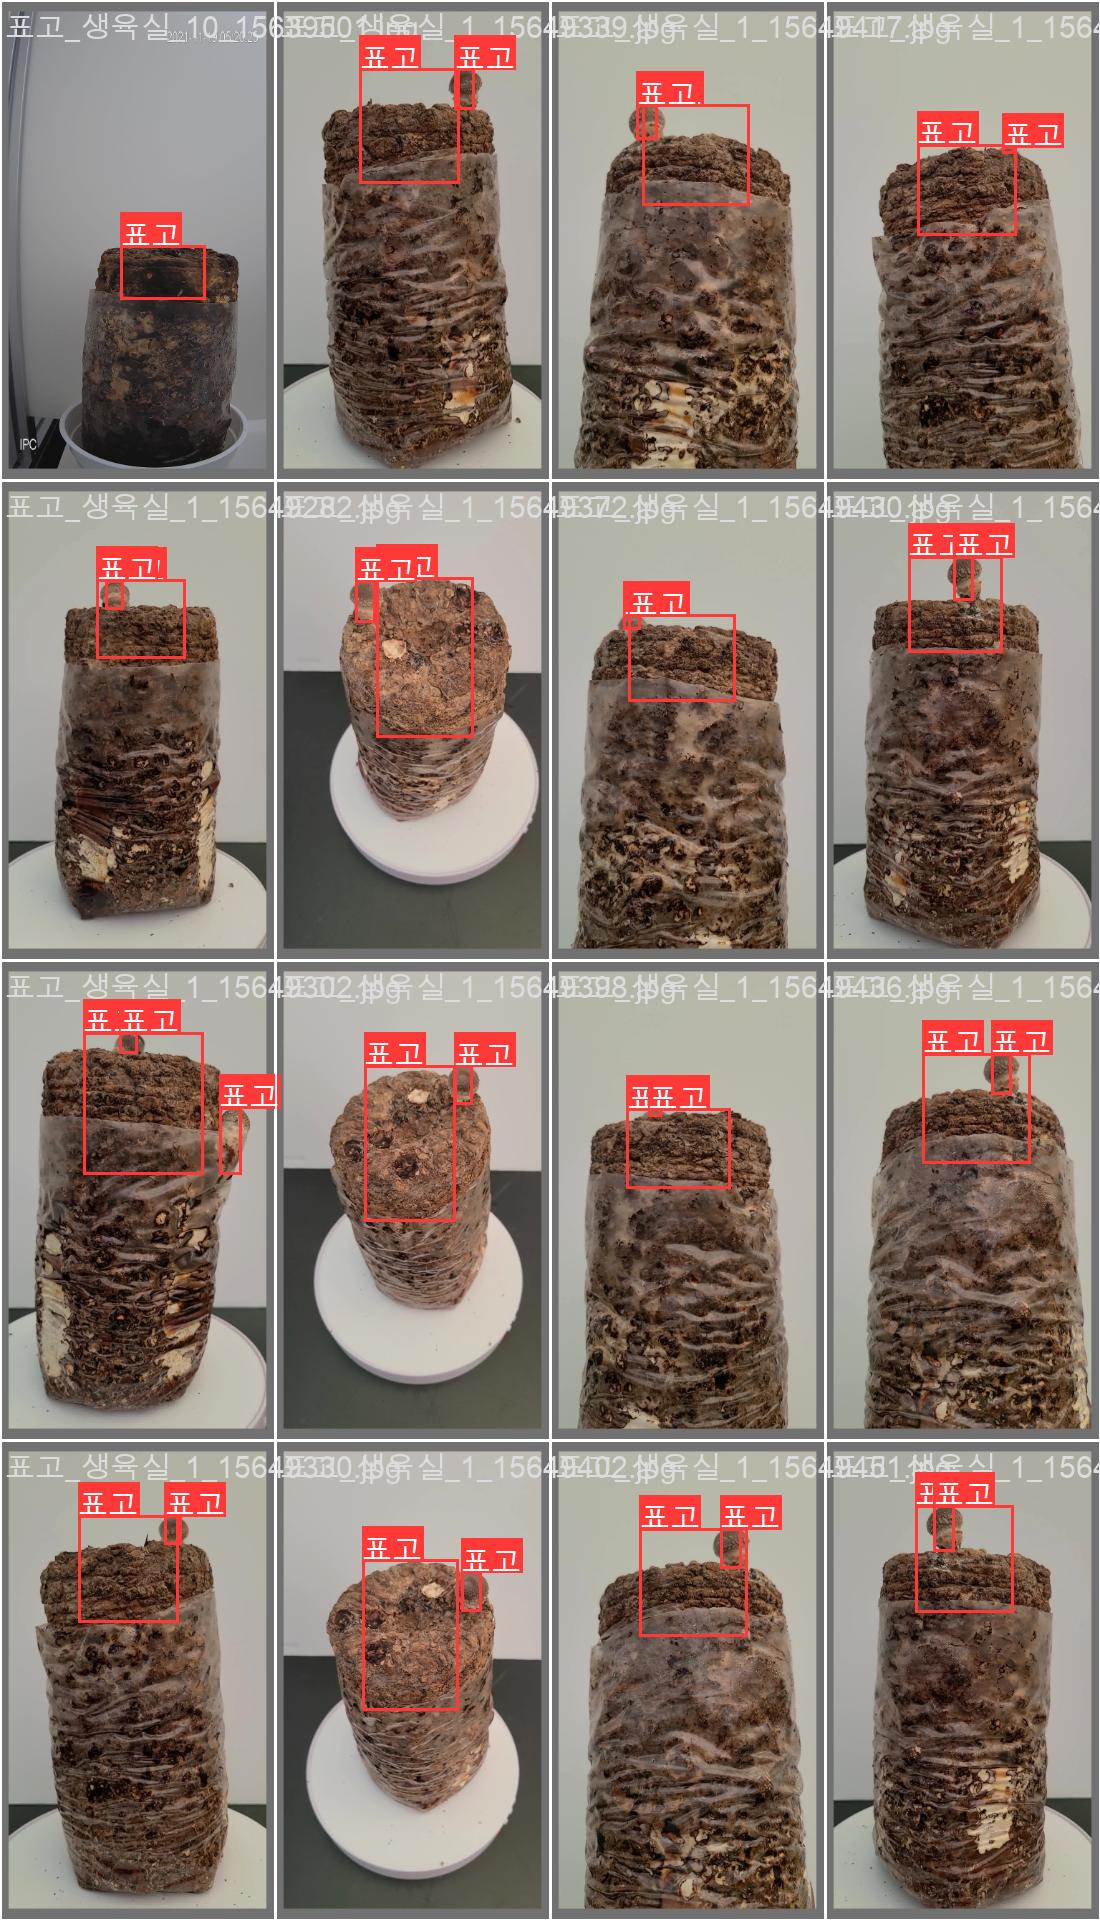

In [20]:
Image('/kaggle/working/mush_workdir/shiitake/val_batch0_labels.jpg')

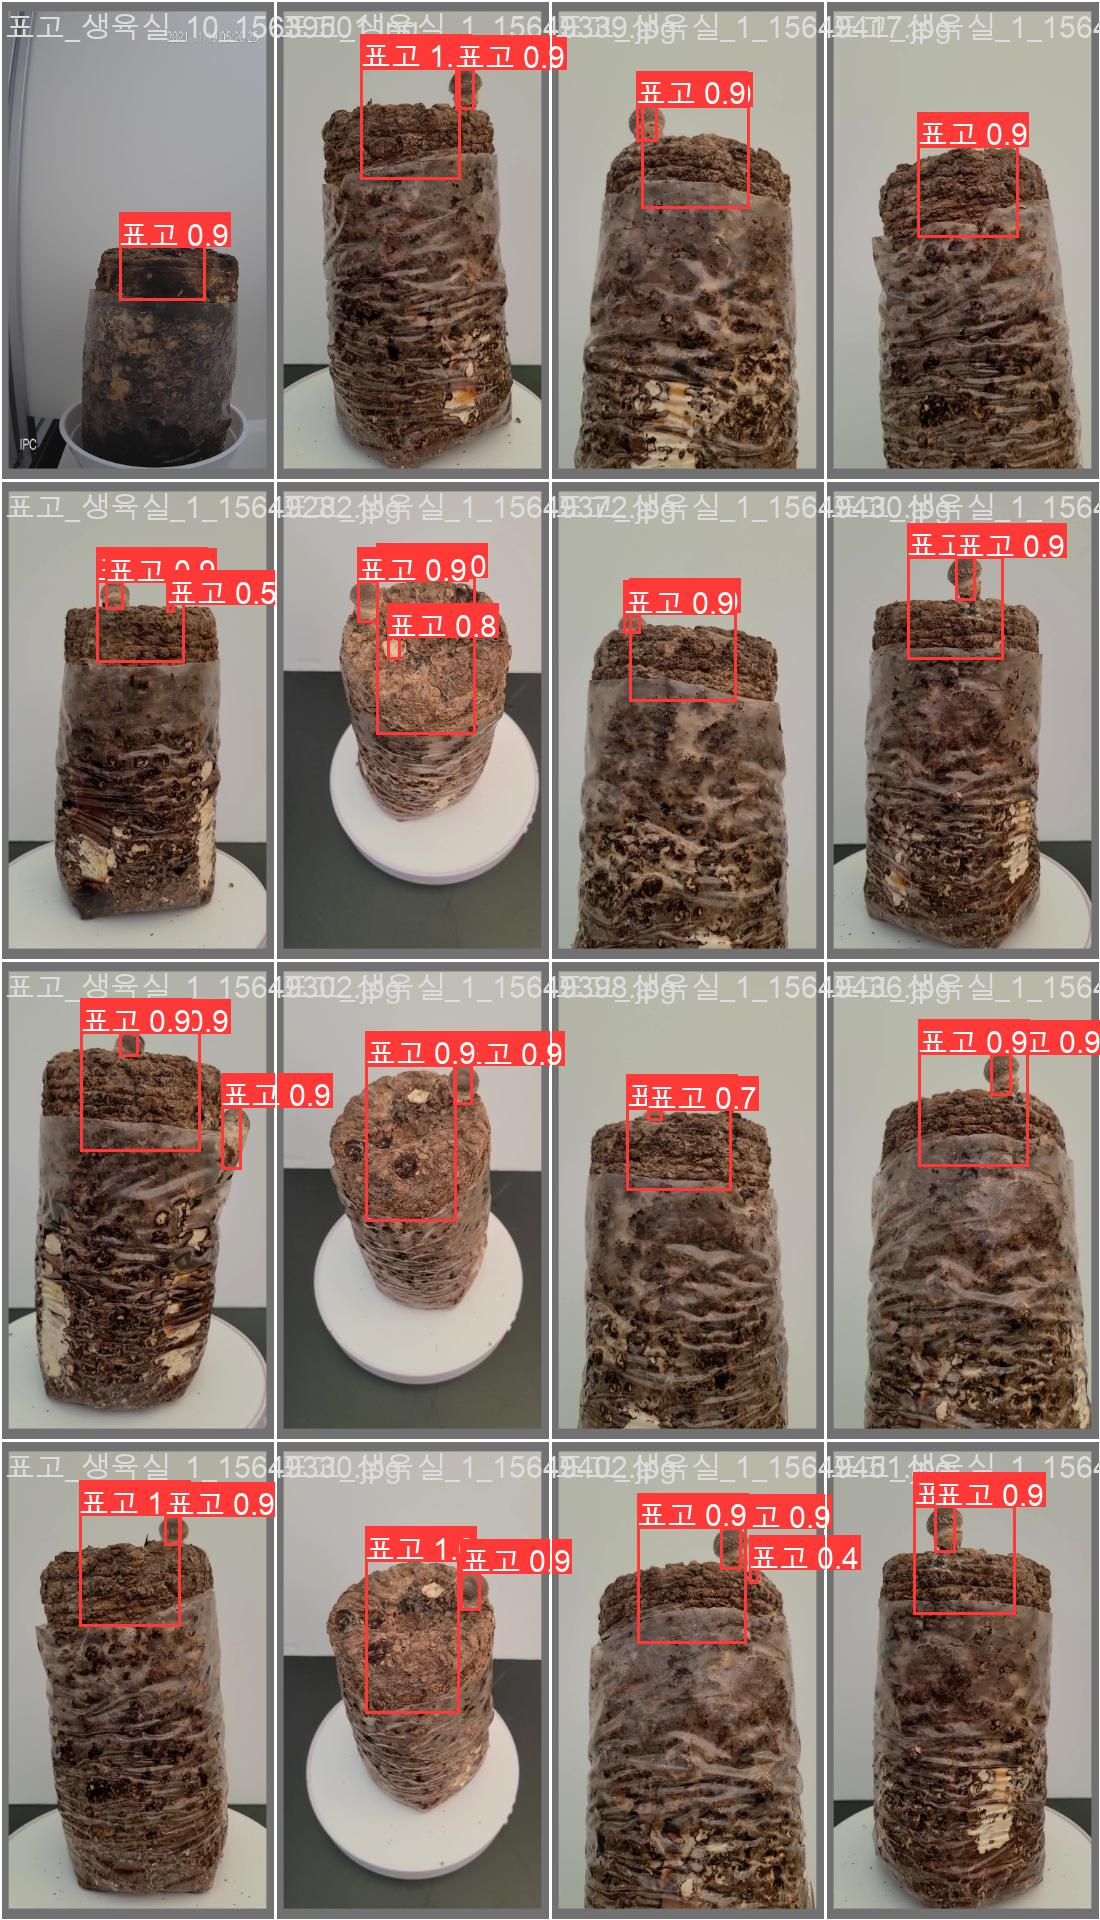

In [21]:
Image('/kaggle/working/mush_workdir/shiitake/val_batch0_pred.jpg')